In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from scipy.stats import chi2, chi2_contingency

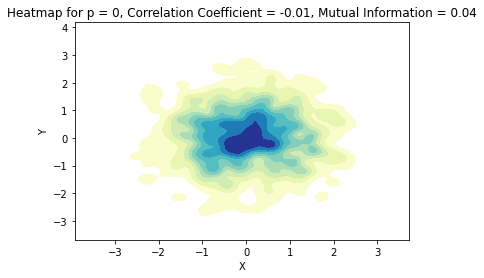

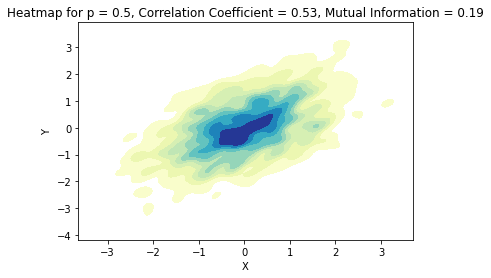

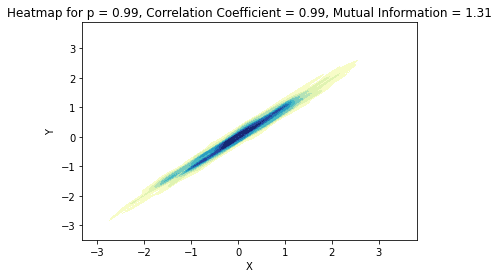

In [4]:
# Define the range of p values
p_values = [0, 0.5, 0.99]

# Function to compute mutual information
def compute_mutual_info(x, y):
    bins_x = np.digitize(x, np.histogram_bin_edges(x, bins=10))
    bins_y = np.digitize(y, np.histogram_bin_edges(y, bins=10))
    return mutual_info_score(bins_x, bins_y)

# Iterate over different values of p
for p in p_values:
    mean = [0, 0]
    n = 1000
    # Define the covariance matrix
    covariance_matrix = np.array([[1, p], [p, 1]])
    
    # Generate samples from the multivariate normal distribution
    samples = np.random.multivariate_normal(mean, covariance_matrix, size=n)
    
    # Calculate mutual information
    mutual_info = compute_mutual_info(samples[:, 0], samples[:, 1])
    
    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(samples[:,0], samples[:,1])[0,1]
    
    # Plot heatmap
    sns.kdeplot(x=samples[:,0], y=samples[:,1], cmap="YlGnBu", shade=True, bw_adjust=0.5)
    plt.title(f"Heatmap for p = {p}, Correlation Coefficient = {correlation_coefficient:.2f}, Mutual Information = {mutual_info:.2f}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

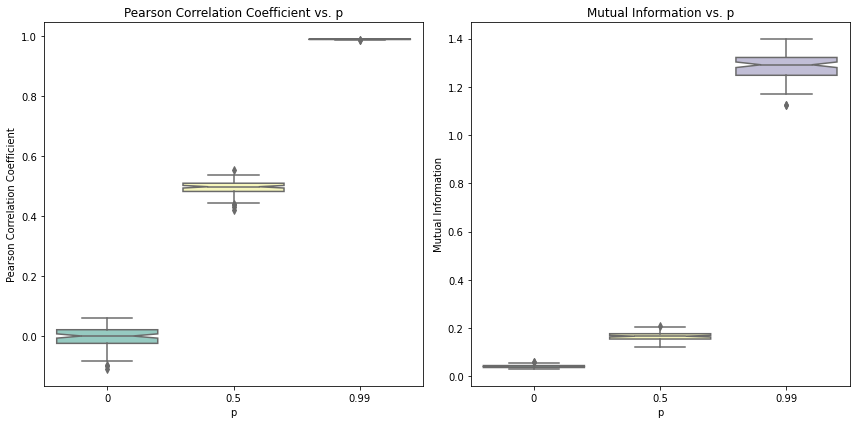

In [5]:
# Define parameters
p_values = [0, 0.5, 0.99]
n_iterations = 100
n = 1000

# Initialize arrays to store results
pearson_corr_results = {p: [] for p in p_values}
mutual_info_results = {p: [] for p in p_values}

# Iterate over different values of p
for p in p_values:
    for _ in range(n_iterations):
        # Define the covariance matrix
        covariance_matrix = np.array([[1, p], [p, 1]])
        
        # Generate samples from the multivariate normal distribution
        samples = np.random.multivariate_normal(mean, covariance_matrix, size=n)
        
        # Compute Pearson correlation coefficient
        pearson_corr = np.corrcoef(samples[:,0], samples[:,1])[0,1]
        pearson_corr_results[p].append(pearson_corr)
        
        # Discretize variables into 10 bins each
        discretized_x = np.digitize(samples[:, 0], np.histogram_bin_edges(samples[:, 0], bins=10))
        discretized_y = np.digitize(samples[:, 1], np.histogram_bin_edges(samples[:, 1], bins=10))
        
        # Compute mutual information
        mutual_info = mutual_info_score(discretized_x, discretized_y)
        mutual_info_results[p].append(mutual_info)

# Plot results
plt.figure(figsize=(12, 6))

# Box plot for Pearson correlation
plt.subplot(1, 2, 1)
sns.boxplot(data=list(pearson_corr_results.values()), notch=True, palette="Set3")
plt.xticks(range(len(p_values)), p_values)
plt.xlabel('p')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pearson Correlation Coefficient vs. p')

# Box plot for Mutual Information
plt.subplot(1, 2, 2)
sns.boxplot(data=list(mutual_info_results.values()), notch=True, palette="Set3")
plt.xticks(range(len(p_values)), p_values)
plt.xlabel('p')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs. p')

plt.tight_layout()
plt.show()

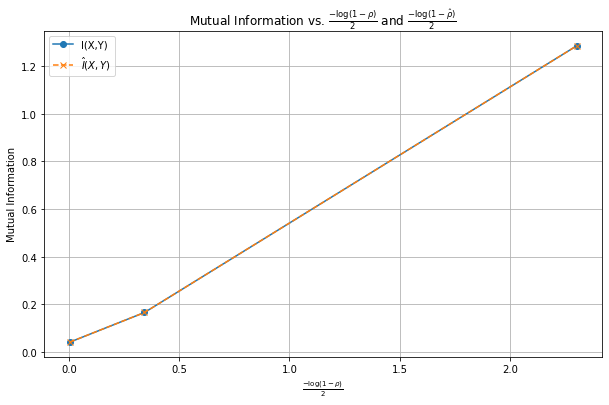

In [6]:
# Convert Pearson correlation coefficients and mutual information results to arrays
pearson_corr_results_array = np.array([np.mean(pearson_corr_results[p]) for p in p_values])
mutual_info_results_array = np.array([np.mean(mutual_info_results[p]) for p in p_values])

# Calculate -log(1 - rho) / 2
neg_log_one_minus_rho = -np.log(1 - np.abs(pearson_corr_results_array)) / 2

# Calculate -log(1 - rho_hat) / 2
neg_log_one_minus_rho_hat = -np.log(1 - np.abs(pearson_corr_results_array)) / 2

# Plot mutual information vs. -log(1 - rho) / 2 and -log(1 - rho_hat) / 2
plt.figure(figsize=(10, 6))
plt.plot(neg_log_one_minus_rho, mutual_info_results_array, marker='o', label='I(X,Y)')
plt.plot(neg_log_one_minus_rho_hat, mutual_info_results_array, marker='x', linestyle='--', 
         label=r'$\hat{I}(X,Y)$')
plt.xlabel(r'$\frac{-\log(1-\rho)}{2}$')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs. $\\frac{-\log(1-\\rho)}{2}$ and $\\frac{-\log(1-\\hat{\\rho})}{2}$')
plt.legend()
plt.grid(True)
plt.show()

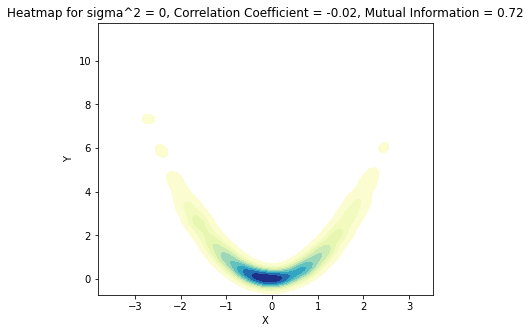

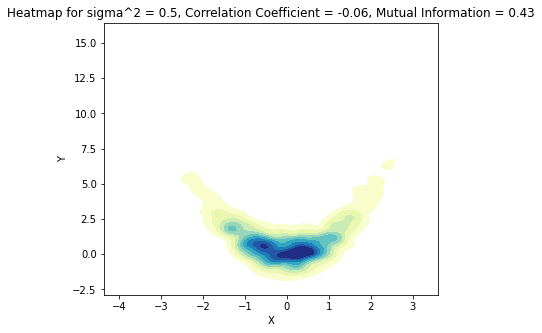

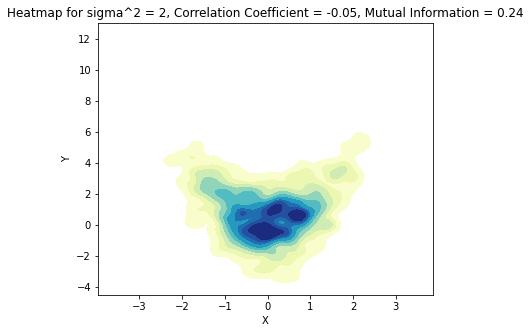

In [7]:
# Define parameters
n = 1000
sigma_values = [0, 0.5, 2]

# Generate data and compute correlations and mutual information for each sigma value
for sigma in sigma_values:
    # Sample X from N(0, 1)
    X = np.random.normal(0, 1, n)
    
    # Generate Y = X^2 + epsilon
    epsilon = np.random.normal(0, np.sqrt(sigma), n)
    Y = X**2 + epsilon
    
    # Compute Pearson correlation
    pearson_corr = np.corrcoef(X, Y)[0, 1]
    
    # Compute mutual information
    mutual_info = compute_mutual_info(X, Y)

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.kdeplot(x=X, y=Y, cmap="YlGnBu", shade=True, bw_adjust=0.5)
    plt.title(f"Heatmap for sigma^2 = {sigma}, Correlation Coefficient = {pearson_corr:.2f}, Mutual Information = {mutual_info:.2f}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


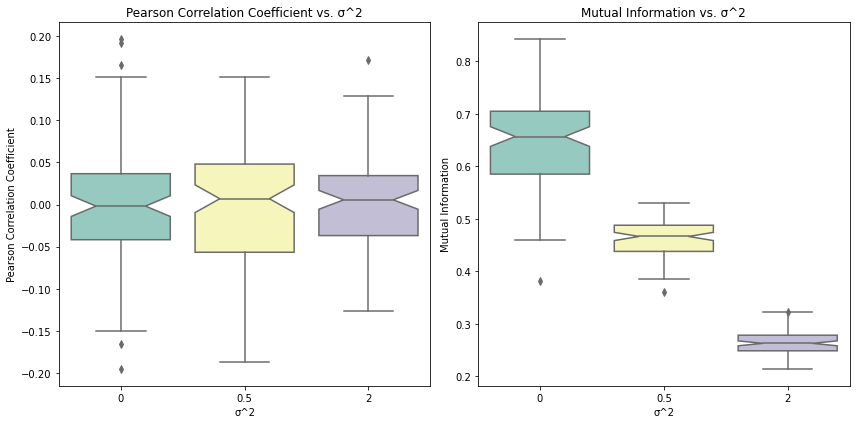

In [8]:
# Define parameters
sigma_values = [0, 0.5, 2]
n_iterations = 100
n = 1000

# Initialize arrays to store results
pearson_corr_results = {sigma: [] for sigma in sigma_values}
mutual_info_results = {sigma: [] for sigma in sigma_values}

# Function to compute mutual information
def compute_mutual_info(x, y):
    bins_x = np.digitize(x, np.histogram_bin_edges(x, bins=10))
    bins_y = np.digitize(y, np.histogram_bin_edges(y, bins=10))
    return mutual_info_score(bins_x, bins_y)

# Repeat experiment N times for each sigma value
for sigma in sigma_values:
    for _ in range(n_iterations):
        # Sample X from N(0, 1)
        X = np.random.normal(0, 1, n)
        
        # Generate Y = X^2 + epsilon
        epsilon = np.random.normal(0, np.sqrt(sigma), n)
        Y = X**2 + epsilon
        
        # Compute Pearson correlation
        pearson_corr = np.corrcoef(X, Y)[0, 1]
        pearson_corr_results[sigma].append(pearson_corr)
        
        # Compute mutual information
        mutual_info = compute_mutual_info(X, Y)
        mutual_info_results[sigma].append(mutual_info)

# Plot results
plt.figure(figsize=(12, 6))

# Box plot for Pearson correlation
plt.subplot(1, 2, 1)
sns.boxplot(data=list(pearson_corr_results.values()), notch=True, palette="Set3")
plt.xticks(range(len(sigma_values)), sigma_values)
plt.xlabel('σ^2')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pearson Correlation Coefficient vs. σ^2')

# Box plot for Mutual Information
plt.subplot(1, 2, 2)
sns.boxplot(data=list(mutual_info_results.values()), notch=True, palette="Set3")
plt.xticks(range(len(sigma_values)), sigma_values)
plt.xlabel('σ^2')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs. σ^2')

plt.tight_layout()
plt.show()

In [15]:
def asymptotic_independence_test(X, Y, stats):
    """
    Run asymptotic independence tests.

    Args:
    - X: Array-like, variable X.
    - Y: Array-like, variable Y.
    - stats: String, either 'mi' for mutual information or 'chi2' for Pearson's χ² statistic.

    Returns:
    - test_statistic: Float, test statistic value.
    - p_value: Float, p-value.
    """
    n = len(X)
    bins = 10
    bins_x = np.digitize(X, np.histogram_bin_edges(X, bins=bins))
    bins_y = np.digitize(Y, np.histogram_bin_edges(Y, bins=bins))
    
    if stats == 'mi':
        # Compute mutual information
        mutual_info = mutual_info_score(bins_x, bins_y)
        test_statistic = 2 * n * mutual_info
        
        # Compute p-value using asymptotic distribution
        degrees_of_freedom = (bins - 1) * (bins - 1)
        p_value = 1 - chi2.cdf(test_statistic, degrees_of_freedom)
    elif stats == 'chi2':
        # Compute Pearson's chi-squared statistic
        contingency_table = np.histogram2d(bins_x, bins_y, bins=[range(1, bins+1), range(1, bins+1)])[0]
        # Perform chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        test_statistic = chi2_stat
    else:
        raise ValueError("Invalid value for 'stats'. Choose 'mi' for mutual information or 'chi2' for Pearson's statistic.")
    
    return test_statistic, p_value

In [16]:
def permutation_independence_test(X, Y, B):
    """
    Perform independence test based on permutations.

    Args:
    - X: Array-like, variable X.
    - Y: Array-like, variable Y.
    - B: Integer, number of permutations.

    Returns:
    - test_statistic: Float, test statistic value.
    - p_value: Float, p-value.
    """
    n = len(X)
    
    # Discretize variables into bins
    bins_x = np.digitize(X, np.histogram_bin_edges(X, bins=10))
    bins_y = np.digitize(Y, np.histogram_bin_edges(Y, bins=10))
    
    original_mi = mutual_info_score(bins_x, bins_y)
    mi_permuted = []
    
    for _ in range(B):
        permuted_X = np.random.permutation(bins_x)
        mi = mutual_info_score(permuted_X, bins_y)
        mi_permuted.append(mi)
    
    mi_permuted = np.array(mi_permuted)
    p_value = ( 1 + np.sum(original_mi <= mi_permuted) ) / (1 + B)
    
    return original_mi, p_value

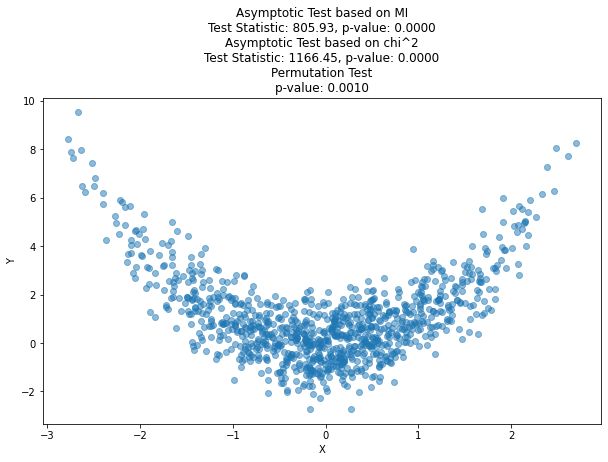

In [19]:
# Generate dependent data
n = 1000
X = np.random.normal(0, 1, n)
Y = X**2 + np.random.normal(0, 1, n)

# Perform independence tests
asymptotic_mi_test = asymptotic_independence_test(X, Y, 'mi')
asymptotic_chi2_test = asymptotic_independence_test(X, Y, 'chi2')
permutation_test = permutation_independence_test(X, Y, 1000)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

# Add titles with test results
title = f"Asymptotic Test based on MI\nTest Statistic: {asymptotic_mi_test[0]:.2f}, p-value: {asymptotic_mi_test[1]:.4f}\n" \
        f"Asymptotic Test based on chi^2\nTest Statistic: {asymptotic_chi2_test[0]:.2f}, p-value: {asymptotic_chi2_test[1]:.4f}\n" \
        f"Permutation Test\np-value: {permutation_test[1]:.4f}"
plt.title(title)

plt.show()

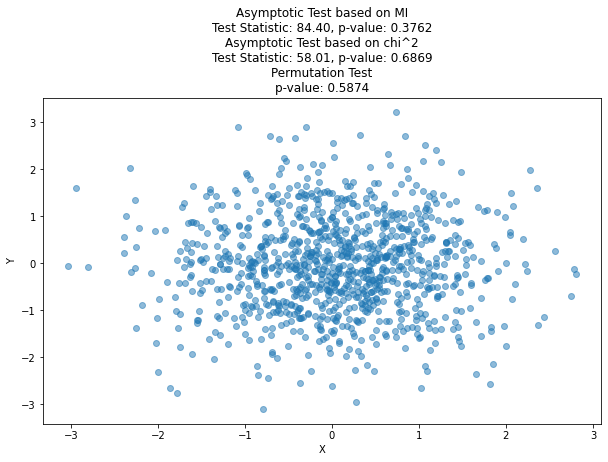

In [18]:
# Generate independent data
n = 1000
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

# Perform independence tests
asymptotic_mi_test = asymptotic_independence_test(X, Y, 'mi')
asymptotic_chi2_test = asymptotic_independence_test(X, Y, 'chi2')
permutation_test = permutation_independence_test(X, Y, 1000)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

# Add titles with test results
title = f"Asymptotic Test based on MI\nTest Statistic: {asymptotic_mi_test[0]:.2f}, p-value: {asymptotic_mi_test[1]:.4f}\n" \
        f"Asymptotic Test based on chi^2\nTest Statistic: {asymptotic_chi2_test[0]:.2f}, p-value: {asymptotic_chi2_test[1]:.4f}\n" \
        f"Permutation Test\np-value: {permutation_test[1]:.4f}"
plt.title(title)

plt.show()